## _Assignment 2_

### Importing necessary packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
diabetes = load_diabetes()
diabetes.data.shape
scaler = StandardScaler()

In [2]:
#Helped me understand the diabetes dataset
#print(diabetes.DESCR)

### Item 1 and 2:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],
diabetes['target'], random_state=2111) #random state in Bday format DDMM

### Item 3:

### Training and Test R^2 for the Lasso model

In [4]:
lasso = Lasso().fit(X_train,y_train)
score = lasso.score(X_train,y_train)

print("Training score = " + str(score))
#lasso.score(X_train,y_train).round(3) if rounded number is needed

Training score = 0.3678443557281196


In [5]:
# lasso_test = Lasso().fit(X_test,y_test)
score_test = lasso.score(X_test,y_test)

print("Test score = " + str(score_test))

Test score = 0.35279881442735406


In [6]:
lasso.coef_

array([  0.        ,  -0.        , 371.97246841,  45.52934317,
         0.        ,   0.        ,  -0.        ,   0.        ,
       285.50930631,   0.        ])

### Item 3 continued:
#### This model uses 10 features

In [7]:
list(zip(diabetes.feature_names, lasso.coef_)) 

[('age', 0.0),
 ('sex', -0.0),
 ('bmi', 371.97246841098786),
 ('bp', 45.529343171196146),
 ('s1', 0.0),
 ('s2', 0.0),
 ('s3', -0.0),
 ('s4', 0.0),
 ('s5', 285.509306305682),
 ('s6', 0.0)]

### Importing the original dataset

In [8]:
X = np.genfromtxt("diabetes.data",skip_header = 1,usecols=np.arange(10)) # all the columns except the last 
y = np.genfromtxt("diabetes.data", skip_header = 1,usecols=-1) #only the last column

In [9]:
print(X_train.shape)
print(X_test.shape)

(331, 10)
(111, 10)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2111) #random state in Bday format DDMM

### Item 6:

In [11]:
lasso = Lasso().fit(X_train,y_train)
score = lasso.score(X_train,y_train)

print("Before normalization:")
print("Training = " + str(score))

Before normalization:
Training = 0.5366184151228652


### As we can see below the model uses 10 features again just like the one in item 3

In [12]:
lasso.coef_

array([-9.34109683e-02, -2.15859941e+01,  5.73504874e+00,  1.34121746e+00,
        1.76453014e-02, -2.83321589e-01, -1.09028194e+00,  0.00000000e+00,
        3.95997336e+01,  3.46609585e-01])

In [13]:
score_test = lasso.score(X_test,y_test)

print("Before normalization:")
print("Test score = " + str(score_test))

Before normalization:
Test score = 0.4315934063062895


### Preprocessing the training and test sets using StandardScaler from sklearn library.

In [14]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### item number 3 on the scaled data above.

In [15]:
lasso = Lasso().fit(X_train_scaled,y_train)
score = lasso.score(X_train_scaled,y_train)

print("After normalization:")
print("Training = " + str(score))

After normalization:
Training = 0.5388833069040577


In [16]:
score_test = lasso.score(X_test_scaled,y_test)

print("After normalization:")
print("Test score = " + str(score_test))

After normalization:
Test score = 0.4364336729139563


In [17]:
lasso.coef_

array([ -0.        , -11.42907265,  24.623985  ,  16.94954831,
        -8.58851647,  -0.        ,  -9.14591699,   0.        ,
        26.3098244 ,   2.70353909])

### Are your current results closer to those in item 3 or item 6? 
### The scores after normalization are closer to item 6 and that is because the R^2 score is uneffected by the units we use. for instance, it makes no difference to R2 if we use Kilometers or meters; as long as it uses the same measurement
### Normalization is used to improve interpretation or numerical stability.


# Item 9:

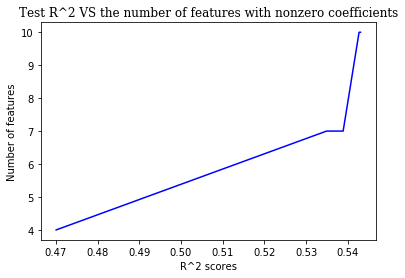

Best aplha is  1e-11
Best score is  0.5431


In [18]:
scores = []
non_zeros = []
best_score = 0
for a in [0.00000000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 10]:
    lasso = Lasso(alpha = a, max_iter =100000).fit(X_train_scaled,y_train)
    score = lasso.score(X_train_scaled,y_train)
    scores.append(score)
    if score > best_score:
        best_score = score 
        best_alpha = a
    non_zeros.append(np.count_nonzero(lasso.coef_))

plt.title("Test R^2 VS the number of features with nonzero coefficients", fontdict = {'fontname' : 'serif'})
plt.xlabel("R^2 scores")
plt.ylabel("Number of features")
plt.plot(scores, non_zeros, color = "blue")
plt.show()

print("Best aplha is ", best_alpha)
print("Best score is ", best_score.round(4))

### Item 10:

0.4827016553388027
0.48270166737847264
0.4827017757615362
0.48270285883681385
0.4827136225980608
0.48298965527272697
0.48602339498948527
0.4947414928445394
0.4950579715870639
0.4460892621817729


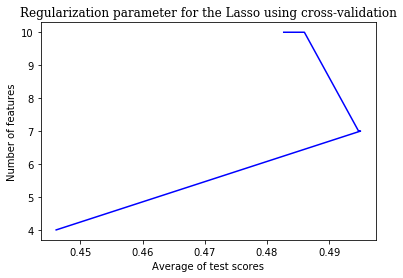

In [19]:
# cross validation
lst = []
non_zeros = []
for a in [0.00000000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 10]:
    lasso = Lasso(alpha = a, max_iter =100000).fit(X_train_scaled,y_train)
    cv = cross_validate(lasso,X_train_scaled, y_train)
    average = (np.sum(cv['test_score']))/len(cv['test_score'])
    print(average)
    lst.append(average)
    non_zeros.append(np.count_nonzero(lasso.coef_))

plt.title("Regularization parameter for the Lasso using cross-validation", fontdict = {'fontname' : 'serif'})
plt.xlabel("Average of test scores")
plt.ylabel("Number of features")
plt.plot(lst, non_zeros,color = "blue")
plt.show()

### Item 11:

#### To avoid confusion, I will import the data again(this avoids having long variable names and make it easier for me). Another way of doing this is changing the name of the variables in item 5 and using them here without importing them. 


In [20]:
X = np.genfromtxt("diabetes.data",skip_header = 1,usecols=np.arange(10)) 
y = np.genfromtxt("diabetes.data", skip_header = 1,usecols=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2111)
training_proper_x, calibration_x, training_proper_y,calibration_y = train_test_split(X_train, y_train, random_state = 2111, test_size = 99)

### Preprocessing the training set, calibration set, and test set using StandardScaler

In [21]:
#scaler was set to StandardScaler above
scaler.fit(training_proper_x)
scaled_training_proper_x = scaler.transform(training_proper_x)
scaled_calibration_x = scaler.transform(calibration_x)
scaled_test_x = scaler.transform(X_test) #testing set

In [22]:
lasso = Lasso().fit(scaled_training_proper_x, training_proper_y)
score = lasso.score(scaled_training_proper_x,training_proper_y)
# print(score)

### I will use the formula below as an inductive nonconformity measure, where $\hat{y}$ is the Lasso prediction computed from the training set proper(calculated above).


### α = |y − $\hat{y}$|


#### Formula and description from slides 50-57 chapter 6.


In [23]:
y_hat = lasso.predict(scaled_calibration_x)
nonconformity = abs(calibration_y - y_hat)
sorted_nonconformity = np.sort(nonconformity)
print(sorted_nonconformity)
# print(len(sorted_nonconformity)) = m for the formula below

[  0.18247889   0.27238966   0.95536948   1.58084601   1.7408132
   1.81879351   2.08383741   2.84197053   3.92339973   5.10867606
   6.48366906   6.62496858   6.65453603   8.37999541   8.96870869
  10.00114321  11.39500713  11.39573049  11.59305214  12.76139213
  13.27606721  14.0688093   14.387453    14.91204521  16.37016238
  16.85563867  17.02024133  17.26575756  17.5859937   19.61532339
  21.94819112  22.3134908   22.36486469  23.12983507  23.43916105
  26.93471019  28.84523075  29.92720375  30.26848701  30.83019475
  35.44558025  35.47150977  36.22304225  36.87197794  36.88348047
  36.89508448  37.4515378   37.57505668  38.06013819  38.21630384
  39.03106321  39.55821144  40.13171174  41.20830917  42.15444901
  42.18523245  43.65476293  43.87040884  43.99869589  44.01358594
  45.01236572  45.30424364  45.71253877  47.68650663  48.15478698
  49.65645263  50.04207775  50.64178781  52.79219461  54.48165963
  54.9731598   55.03604505  55.35679726  57.94224211  58.38703554
  58.528128

## _Finding K and c_
### k = ⌈(1 − ϵ)(m + 1)⌉
### significance levels 5% and 20% => ϵ = 0.05 and 0.2

### k = ⌈(1 − 0.05)(99 + 1)⌉ = 95 
### k = ⌈(1 − 0.2)(99 + 1)⌉ = 80
 
### c = ${\alpha}_{k}$ 


In [24]:
# returing the the index of 95 and 80 
print("C for K 95 is" + " " + str(sorted_nonconformity[94]))
print("C for K 80 is" + " " + str(sorted_nonconformity[79]))

C for K 95 is 98.53609292869493
C for K 80 is 61.29310154936931


### [$\hat{y}$ − c, $\hat{y}$ + c],$\hat{y}$ being the Lasso prediction for this test sample.